# House Prices - Exploratory Data Analysis

## Overview

This notebook explores the data provided by the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) competition.  
Feedback is much appreciated, as this is my first EDA.

Importing libraries and loading data

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

#%matplotlib inline

plt.style.use('seaborn-notebook')

df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

pd.set_option('display.max_columns', 100)

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Summary statistics

In [21]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Does missing data give us data?

In [23]:
incomplete_entry_df = df[[ col for col in df if ((df[col].count() / len(df)) <= 0.6) ]]
incomplete_entry_df

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN,NaN
1,NaN,TA,NaN,NaN,NaN
2,NaN,TA,NaN,NaN,NaN
3,NaN,Gd,NaN,NaN,NaN
4,NaN,TA,NaN,NaN,NaN
...,...,...,...,...,...
1455,NaN,TA,NaN,NaN,NaN
1456,NaN,TA,NaN,MnPrv,NaN
1457,NaN,Gd,NaN,GdPrv,Shed
1458,NaN,NaN,NaN,NaN,NaN


From data description:  
  
  
Alley: Type of alley access to property
> Grvl -- Gravel  
> Pave -- Paved  
> NA   -- No alley access  
  
FireplaceQu: Fireplace quality  
> Ex -- Excellent - Exceptional Masonry Fireplace  
> Gd -- Good - Masonry Fireplace in main level  
> TA -- Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement  
> Fa -- Fair - Prefabricated Fireplace in basement  
> Po -- Poor - Ben Franklin Stove  
> NA -- No Fireplace  

PoolQC: Pool quality
> Ex -- Excellent  
> Gd -- Good  
> TA -- Average/Typical  
> Fa -- Fair  
> NA -- No Pool  

Fence: Fence quality  
> GdPrv -- Good Privacy  
> MnPrv -- Minimum Privacy  
> GdWo -- Good Wood  
> MnWw -- Minimum Wood/Wire  
> NA -- No Fence  

MiscFeature: Miscellaneous feature not covered in other categories
> Elev -- Elevator  
> Gar2 -- 2nd Garage (if not described in garage section)  
> Othr -- Other  
> Shed -- Shed (over 100 SF)  
> TenC -- Tennis Court  
> NA -- None  

In our case, NA is useful, so we shall replace it with "Nope"

In [24]:
categorical_df = df[[col for col in df.columns if (df[col].dtype != "int64") and (df[col].dtype != "float64")]]  # Categorical data

categorical_df = categorical_df.fillna("Nope")

In [25]:
numerical_df = df[[col for col in df.columns if (df[col].dtype == "int64") or (df[col].dtype == "float64")]]  # Numerical data

numerical_with_null_df = numerical_df[[col for col in numerical_df.columns if numerical_df.isnull().any()[col]]] # Numerical data with missing values
numerical_with_null_df

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


LotFrontage: Linear feet of street connected to property

MasVnrArea: Masonry veneer area in square feet

GarageYrBlt: Year garage was built  
<hr>
  
From the descriptions of these features, we can conclude that the values are missing for a logical reason. 
(i.e. A home with no garage will have a missing GarageYrBlt value)  

Thusly, we can replace these values with 0

In [26]:
numerical_df = numerical_df.fillna(0.0)
numerical_df.isnull().any().any() # Making sure there are no missing values

False

Updating the original dataframe with filled-in missing values

In [27]:
for column in df.columns:
    if (column in numerical_df.columns):
        df[column] = numerical_df[column]
    if (column in categorical_df.columns):
        df[column] = categorical_df[column]
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Nope,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Nope,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Nope,Nope,Nope,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Nope,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Nope,Nope,Nope,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Nope,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Nope,Nope,Nope,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Nope,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Nope,Nope,Nope,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Nope,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Nope,Nope,Nope,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Nope,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Nope,Nope,Nope,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Nope,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Nope,MnPrv,Nope,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Nope,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Nope,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Nope,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,T

Perfect! Now since data cleaning is done, let's get on wit the fun and visual stuff.

### Skewed target variable

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

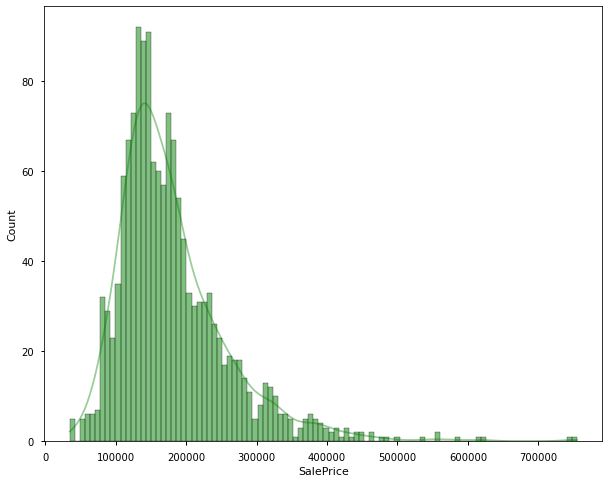

In [28]:
plt.figure(figsize=(10, 8))
sns.histplot(df['SalePrice'], color='g', bins=100, line_kws={'alpha': 0.4}, kde=True)

### Applying log to normalize the distribution

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

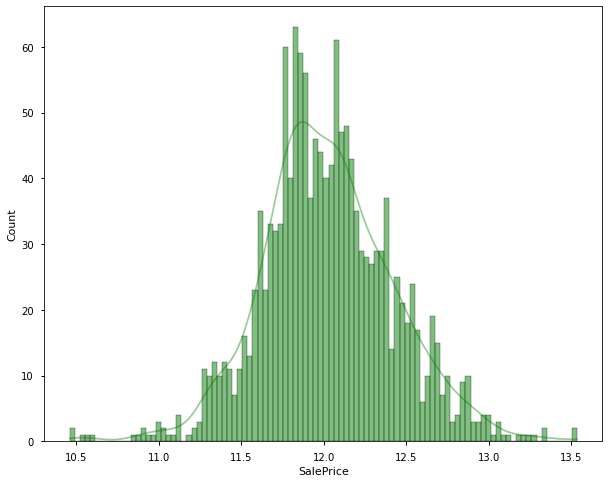

In [29]:
gaussian_sale_price = np.log(1 + df['SalePrice'])

plt.figure(figsize=(10, 8))
sns.histplot(gaussian_sale_price, color='g', bins=100, line_kws={'alpha': 0.4}, kde=True)

## Finding linear correlations

<AxesSubplot:>

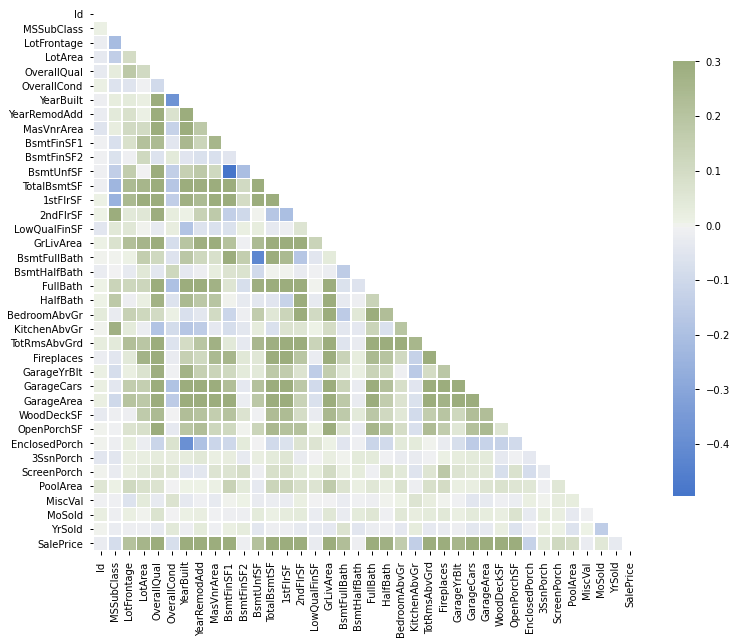

In [30]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(13, 10))
cmap = sns.diverging_palette(255, -255, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

## Finding non-linear correlations

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


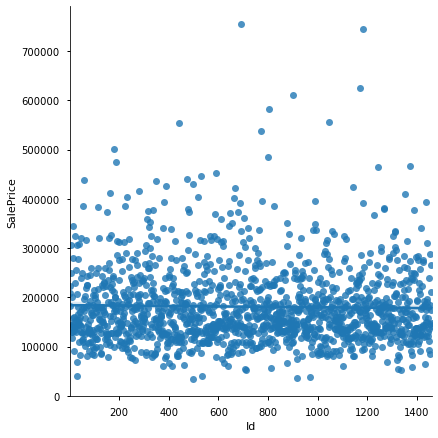

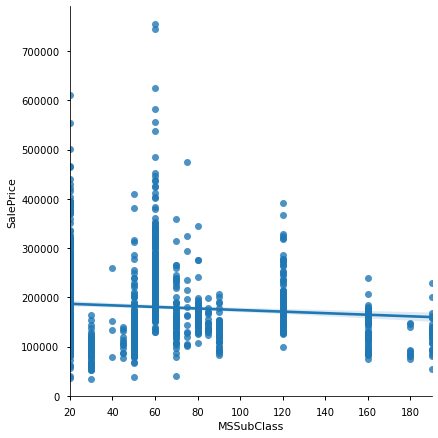

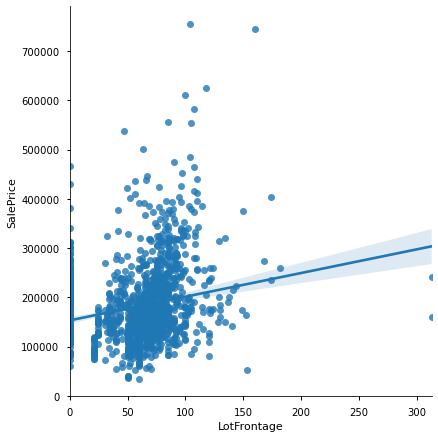

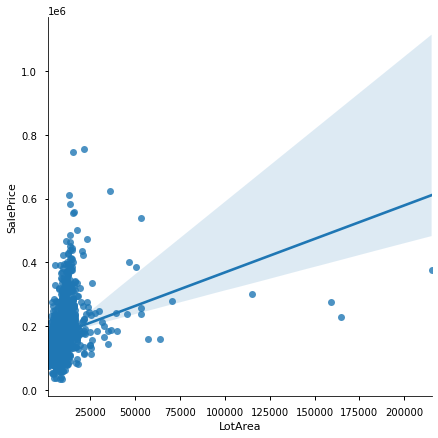

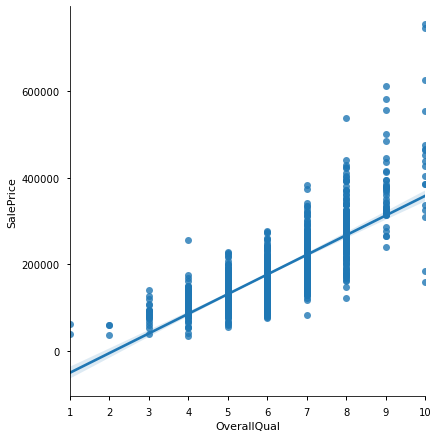

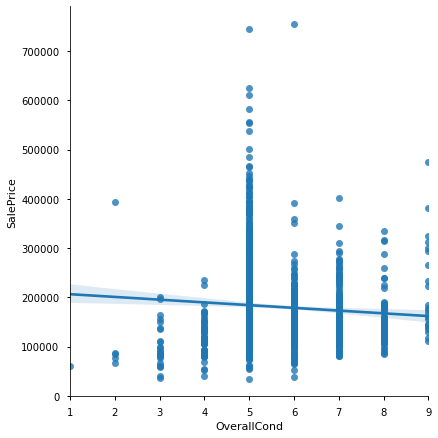

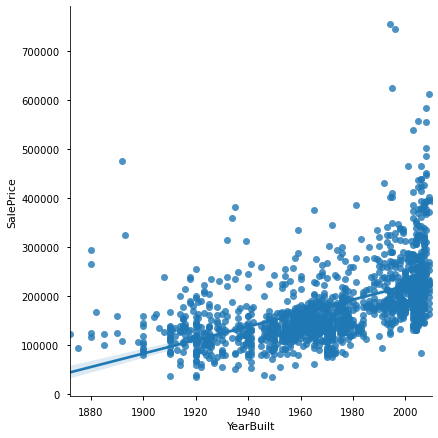

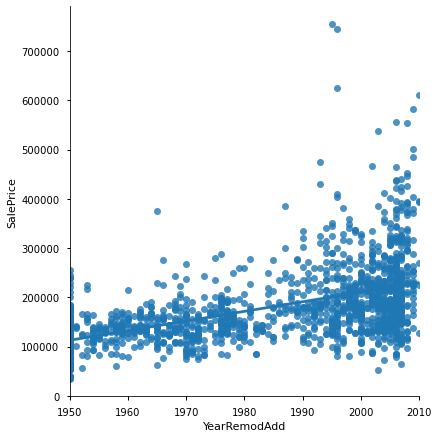

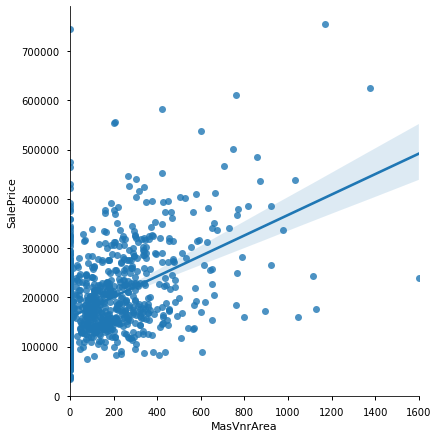

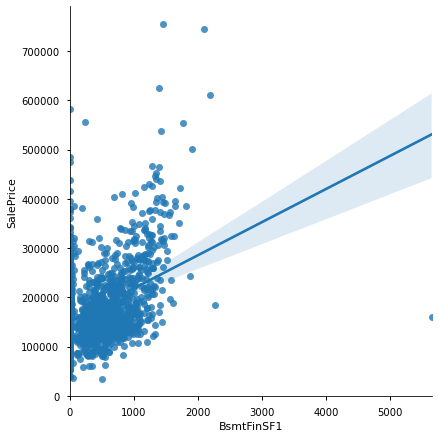

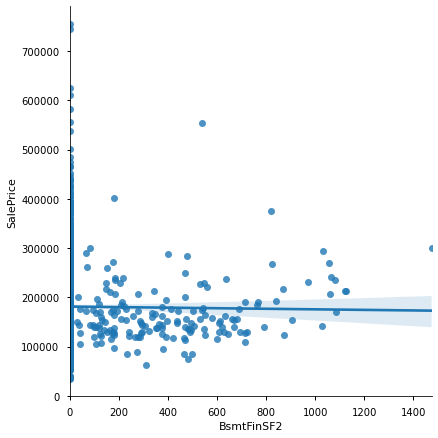

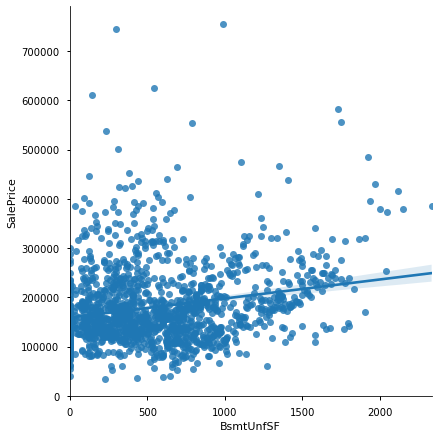

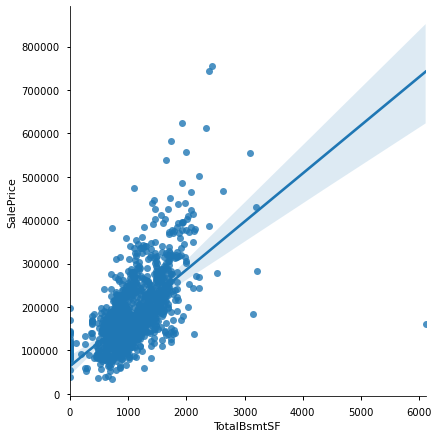

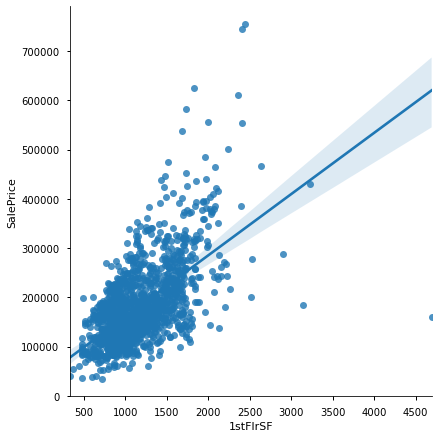

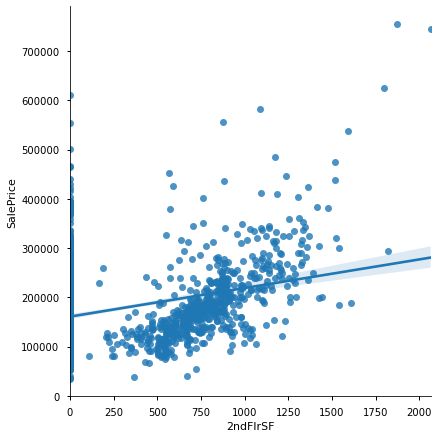

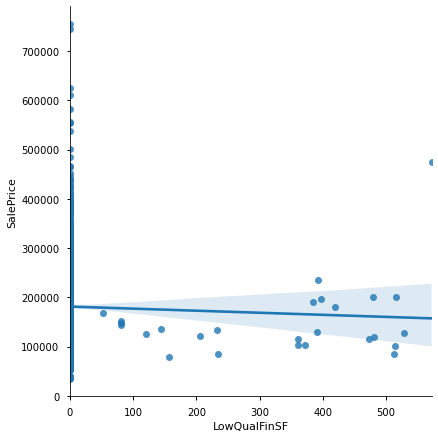

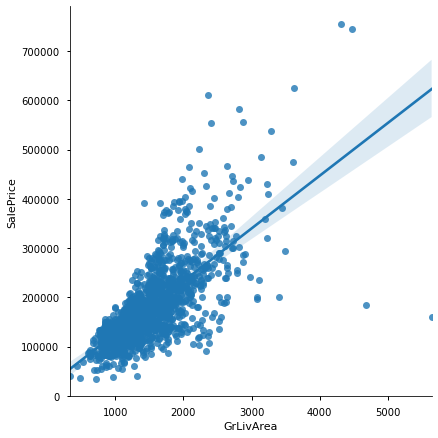

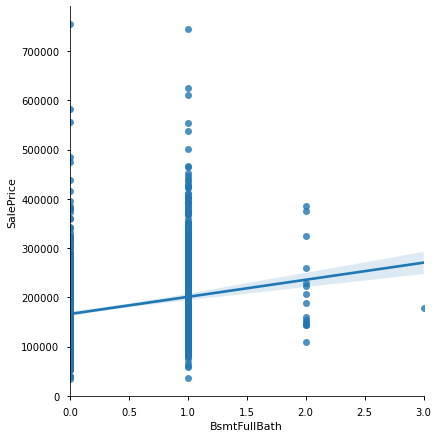

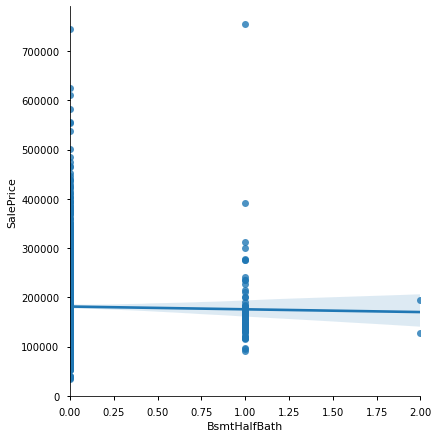

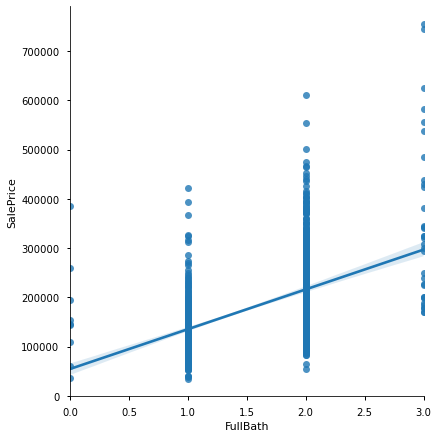

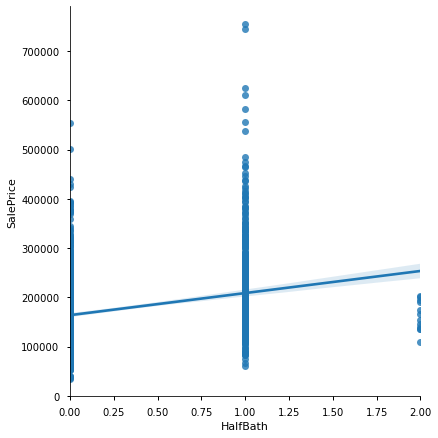

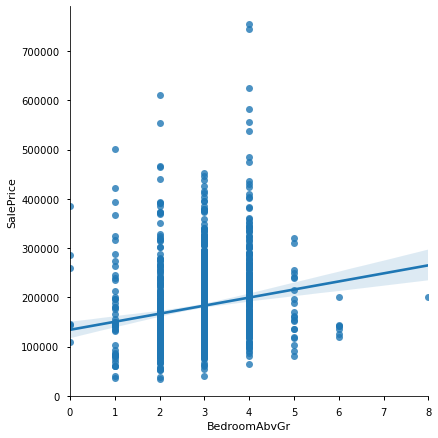

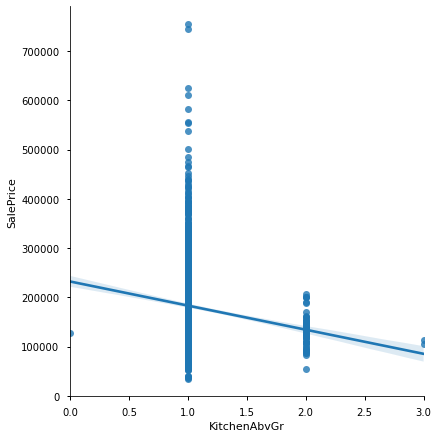

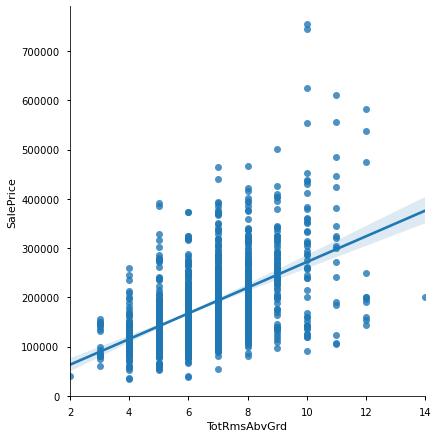

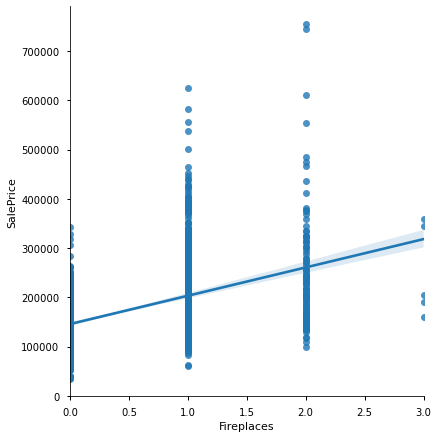

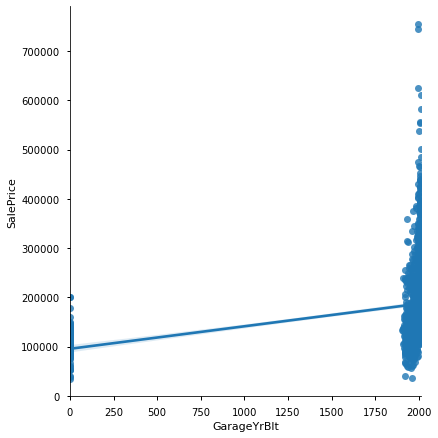

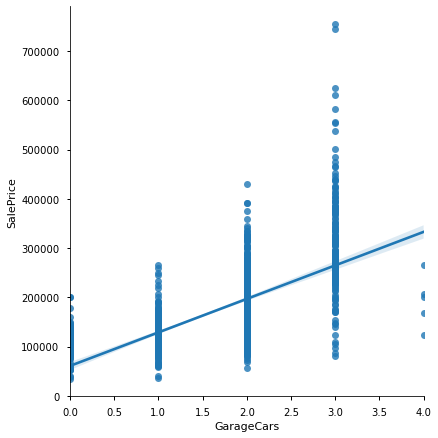

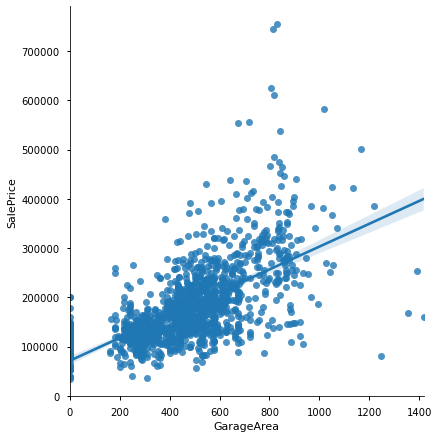

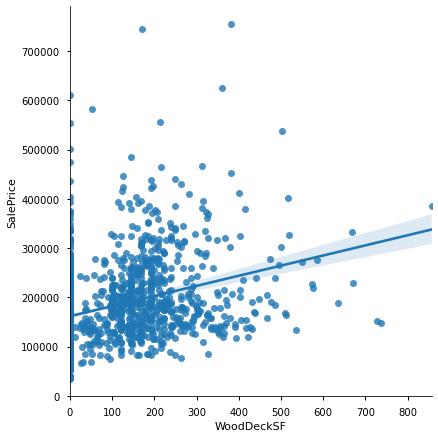

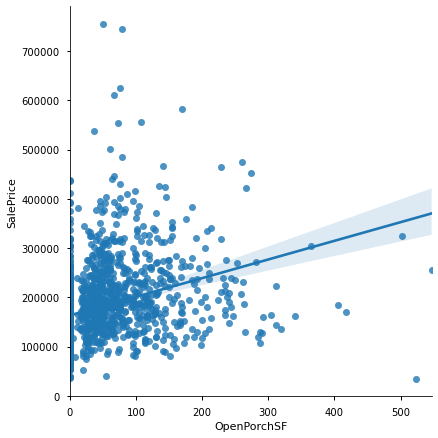

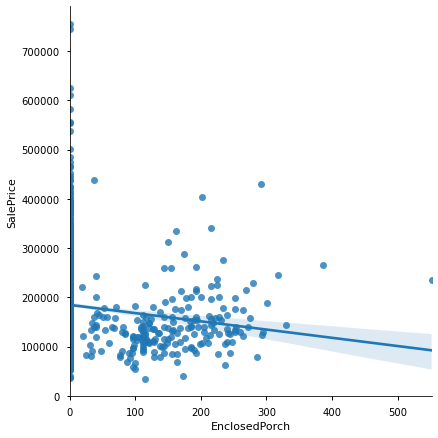

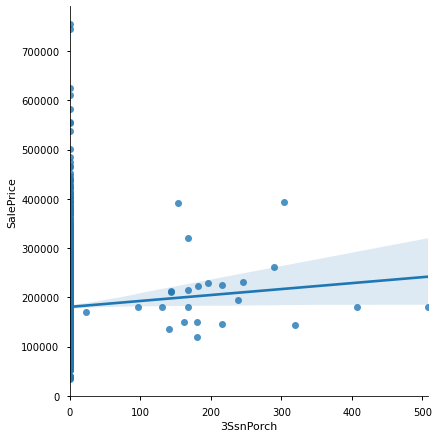

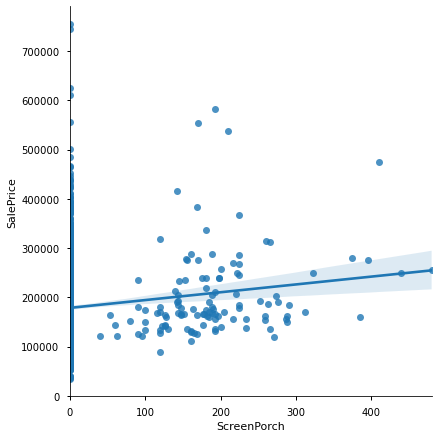

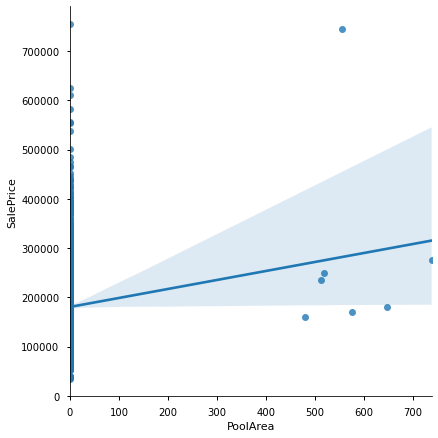

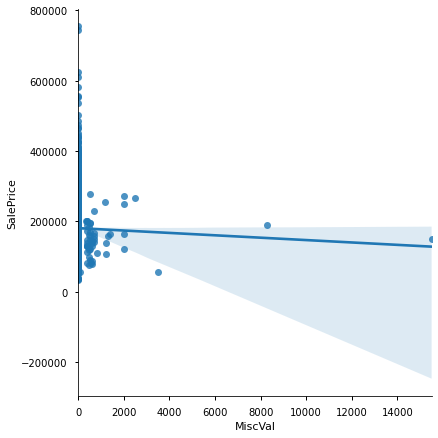

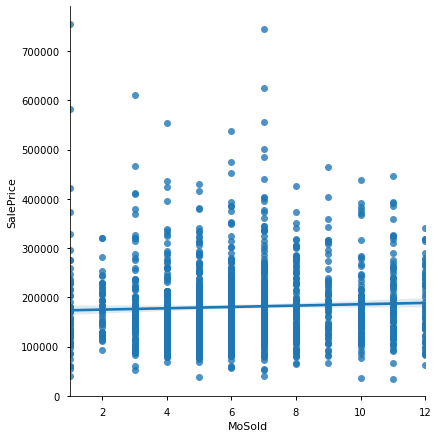

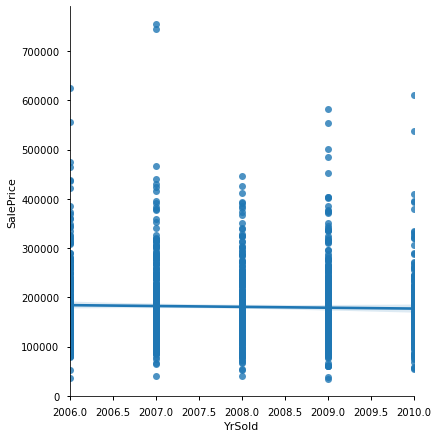

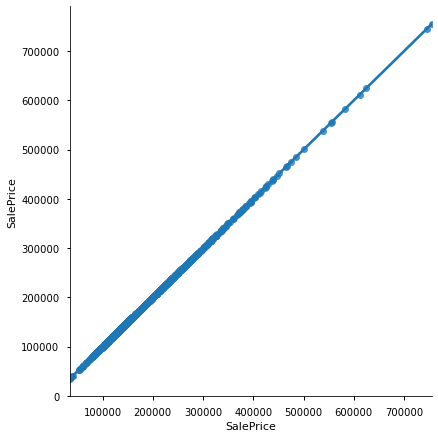

In [31]:
for ncol in range(len(numerical_df.columns)):
    sns.lmplot(data=numerical_df, x = numerical_df.columns[ncol], y = "SalePrice", height=6)

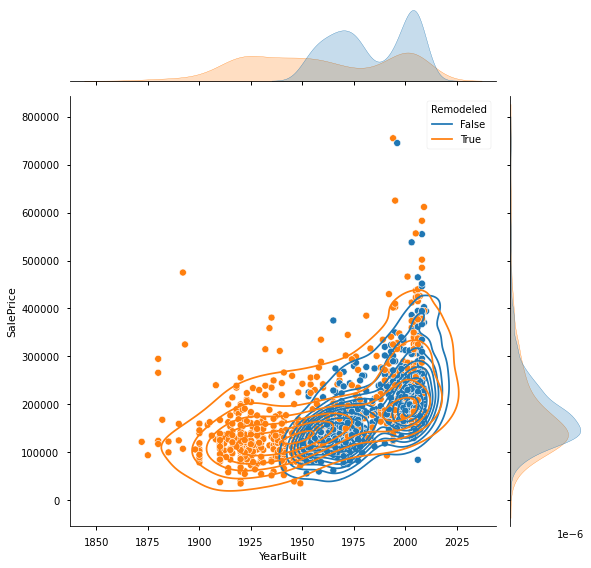

In [33]:
remodeled_df = pd.DataFrame()

remodeled_df["YearBuilt"] = numerical_df["YearBuilt"]
remodeled_df["YearRemodAdd"] = numerical_df["YearRemodAdd"]
remodeled_df["Remodeled"] = remodeled_df["YearBuilt"] < remodeled_df["YearRemodAdd"]
remodeled_df["SalePrice"] = numerical_df["SalePrice"]
sns.jointplot(data = remodeled_df, x = "YearBuilt", y = "SalePrice", hue = "Remodeled", height = 8).plot_joint(sns.kdeplot)

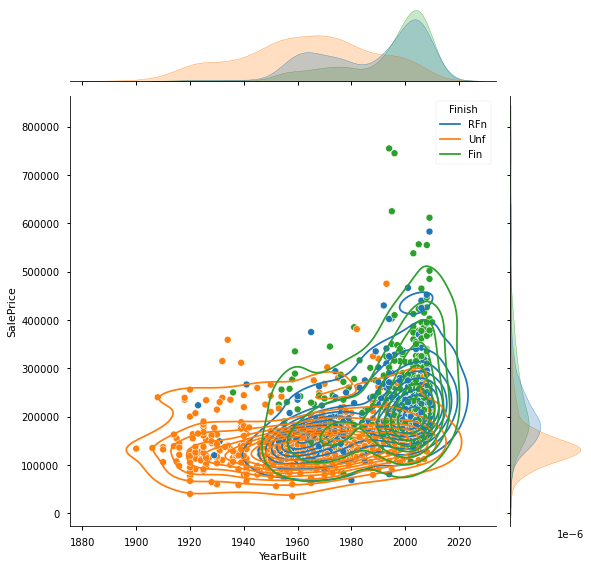

In [40]:
garage_year_df = pd.DataFrame()

garage_year_df["YearBuilt"] = numerical_df["GarageYrBlt"][numerical_df["GarageYrBlt"] != 0]
garage_year_df["Finish"] = categorical_df["GarageFinish"][numerical_df["GarageYrBlt"] != 0]
garage_year_df["SalePrice"] = numerical_df["SalePrice"][numerical_df["GarageYrBlt"] != 0]
sns.jointplot(data = garage_year_df, x = "YearBuilt", y = "SalePrice", hue = "Finish", height = 8).plot_joint(sns.kdeplot)

In [ ]:
# TODO